# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
se = pd.read_csv("../data/states_edu.csv")
print(se.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [118]:
se.rename({
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    },
    axis=1,inplace=True)
se.dropna()
se.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)
se.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
se.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
se.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
se.dropna(subset=['LOCAL_REVENUE'], inplace=True)


<h2>Exploratory Data Analysis (EDA) </h2>

#

Chosen Outcome Variable for Test: AVG_MATH_4_SCORE

How many years of data are logged in our dataset? 

In [87]:
se["YEAR"].max() - se["YEAR"].min()

27

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [94]:

michScore = se[se["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].sum()
oHScore = se[se["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].sum()
print(michScore - oHScore)

-56.0


In [99]:
se["AVG_MATH_4_SCORE"].mean()

239.0899581589958

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [106]:
print(se["STATE"].unique())
for i in se["STATE"].unique():
    print(i, se[se["STATE"] == i]["AVG_MATH_4_SCORE"].max())



['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING' 'NATIONAL' 'DODEA']
ALABAMA 233.0
ALASKA 237.0
ARIZONA 240.0
ARKANSAS 240.0
CALIFORNIA 235.0
COLORADO 247.0
CONNECTICUT 245.0
DELAWARE 243.0
DISTRICT_OF_COLUMBIA 235.0
FLORIDA 246.0
GEORGIA 240.0
HAWAII 243.0
IDAHO 242.0
ILLINOIS 239.0
INDIANA 249.0
IOWA 246.0
KANSAS 248.0
KENTUCKY 242.0
LOUISIANA 234.0
MAINE 246.0
MARYLAND 247.0
MASSACHUSETTS 253.0
MICHIGAN 238.0
MINNESOTA 253.0
MISSISSIPPI 2

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [136]:

for i in se["STATE"].unique():
    print(i)
    print("Local Level")
    print(se[se["STATE"] == i]["LOCAL_REVENUE"]/se[se["STATE"] == i]["AVG_MATH_8_SCORE"])
    print("State Level")
    print(se[se["STATE"] == i]["STATE_REVENUE"]/se[se["STATE"] == i]["AVG_MATH_8_SCORE"])


ALABAMA
Local Level
561     6341.103053
663     7543.816794
765     8680.522556
867     8537.144981
969     8676.732342
1071    9246.665428
1173    9306.430712
dtype: float64
State Level
561     11324.354962
663     12395.274809
765     15304.319549
867     15468.784387
969     14742.059480
1071    14491.996283
1173    15281.524345
dtype: float64
ALASKA
Local Level
562     1265.784946
664     1498.788530
766     1646.604240
868     1726.346290
970     1842.802120
1072    1832.375887
1174    1965.428571
dtype: float64
State Level
562     2915.308244
664     3149.573477
766     3718.575972
868     4797.692580
970     5004.109541
1072    6054.783688
1174    7237.696429
dtype: float64
ARIZONA
Local Level
563     10615.077491
665     12161.897810
767     12922.043478
869     14268.270758
971     14798.820789
1073    14470.725000
1175    13797.385159
dtype: float64
State Level
563     10747.708487
665     12117.503650
767     15232.206522
869     13740.303249
971     10948.032258
1073    104

Feature engineering justification: 8 graders against local revenue, to see if a 'wealthier'/'busier' neighborhood results in students, on average, getting higher scores. The same will be done with state revenue to see. This will be done on a state by state basis, to see which is more impactful: state revenue or local revenue 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 0, 'Local Revenue')

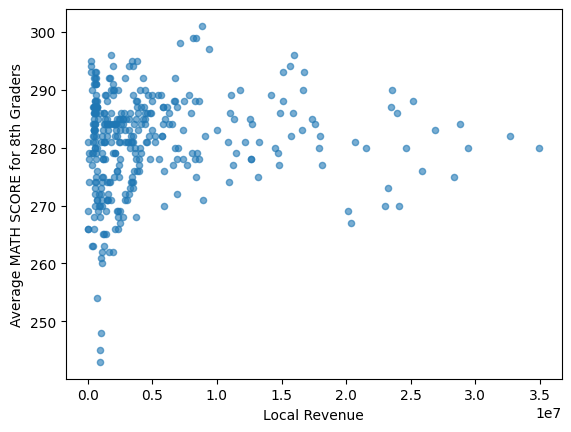

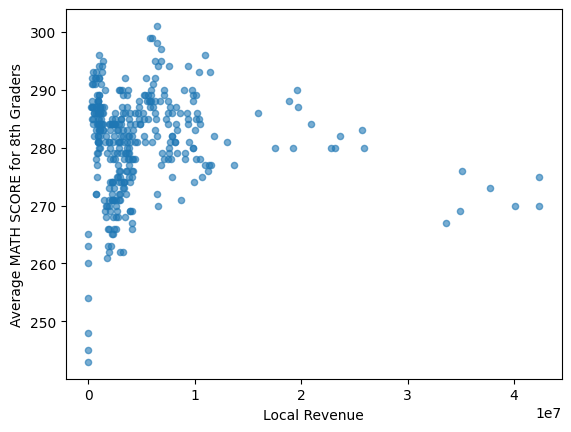

In [151]:
#se.groupby('AVG_MATH_8_SCORE')["LOCAL_REVENUE"].mean().plot()
#plt.ylabel('Average MATH SCORE for 8th Graders')
#plt.title('Local Revenue')

se.plot.scatter(x='LOCAL_REVENUE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.ylabel('Average MATH SCORE for 8th Graders')
plt.xlabel('Local Revenue')
se.plot.scatter(x='STATE_REVENUE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.ylabel('Average MATH SCORE for 8th Graders')
plt.xlabel('State Revenue')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0.5, 1.0, 'AVG_MATH_8_SCORE')

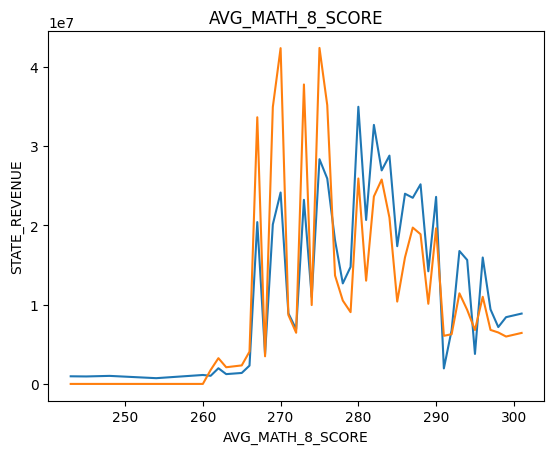

In [163]:
se.groupby('AVG_MATH_8_SCORE')["LOCAL_REVENUE"].max().plot()
plt.ylabel('LOCAL_REVENUE')
plt.title('AVG_MATH_8_SCORE')

se.groupby('AVG_MATH_8_SCORE')["STATE_REVENUE"].max().plot()
plt.ylabel('STATE_REVENUE')
plt.title('AVG_MATH_8_SCORE')

#Local is Blue
#State is Orange 

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X = se[['LOCAL_REVENUE', 'STATE_REVENUE']].dropna()
y = se.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [197]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [198]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [199]:
# create your model here
model = LinearRegression()

In [200]:
model.fit(X_train, y_train)


LinearRegression()

In [201]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [202]:
print(model.intercept_)
print(model.coef_)

280.6122712797446
[ 6.47269176e-07 -5.83702539e-07]


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

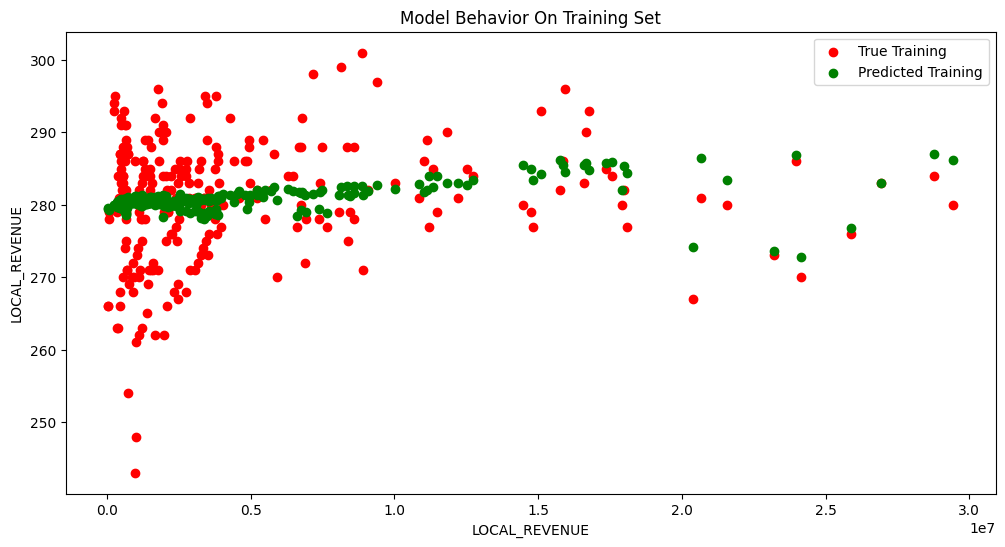

In [205]:
 col_name = 'LOCAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('LOCAL_REVENUE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

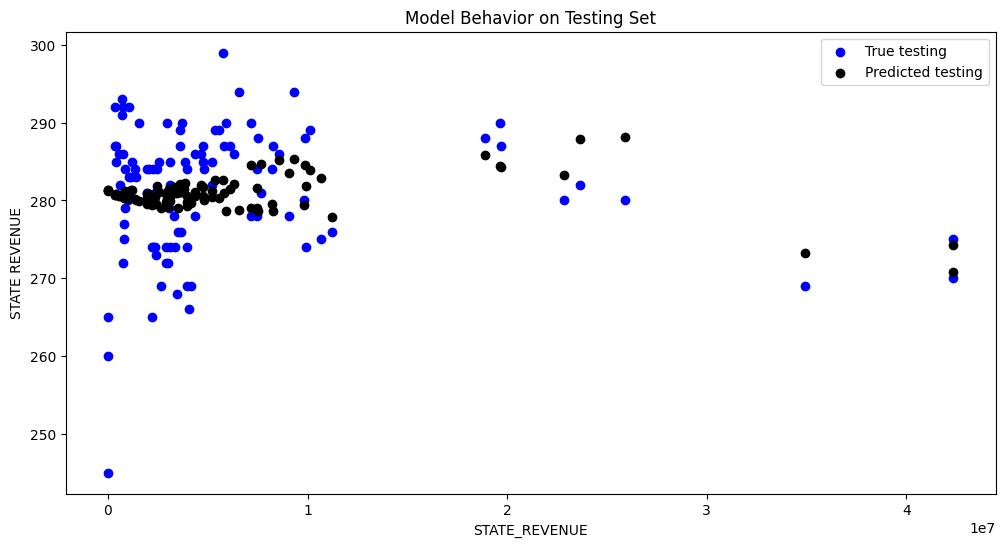

In [207]:
col_name = 'STATE_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('STATE REVENUE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In [ ]:
# I took the data from the State and Local Revenue to see if this would result in math test score in 8th graders to improve.
# What we found was that while increase funding does help increase scores, once we reach a certain point, higher revenue from either levels actually causes the said scores to decrease. 
# Overall, the model was fairly accurate in pinpointing the aproximate mean spread of the data, but had many outliers through the data set, though that was probably just due to the data set itself having wildly placed data points.
